In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Initialize empty expenses list
expenses = []

print("Welcome to Personal Expense Tracker!")

Welcome to Personal Expense Tracker!


In [2]:
def add_expense(category, amount, date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return
    expenses.append({'category': category, 'amount': amount, 'date': date})
    print(f"Added expense: {category} - Rs{amount:.2f} on {date_str}")

In [3]:
add_expense('food', 150.50, '2025-10-01')
add_expense('rent', 500, '2025-10-01')
add_expense('travel', 340, '2025-10-03')
add_expense('food', 100, '2025-09-28')
add_expense('groceries', 125.75, '2025-10-05')
add_expense('entertainment', 150, '2025-10-06')
add_expense('travel', 315, '2025-10-07')
add_expense('food', 320, '2025-10-08')

Added expense: food - Rs150.50 on 2025-10-01
Added expense: rent - Rs500.00 on 2025-10-01
Added expense: travel - Rs340.00 on 2025-10-03
Added expense: food - Rs100.00 on 2025-09-28
Added expense: groceries - Rs125.75 on 2025-10-05
Added expense: entertainment - Rs150.00 on 2025-10-06
Added expense: travel - Rs315.00 on 2025-10-07
Added expense: food - Rs320.00 on 2025-10-08


In [4]:
def summarize_by_period_with_total(period='week'):
    if not expenses:
        print("No expenses to summarize.")
        return
    
    df = pd.DataFrame(expenses)
    
    if period == 'week':
        df['period'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
    elif period == 'month':
        df['period'] = df['date'].dt.to_period('M').apply(lambda r: r.start_time)
    else:
        print("Period must be 'week' or 'month'.")
        return
    
    summary = df.groupby(['period', 'category'])['amount'].sum().unstack(fill_value=0)
    summary['Total'] = summary.sum(axis=1)
    print(f"\nExpense Summary by {period.capitalize()} (with Total):")
    print(summary)


In [5]:
summarize_by_period_with_total('week')


Expense Summary by Week (with Total):
category    entertainment   food  groceries   rent  travel    Total
period                                                             
2025-09-22            0.0  100.0       0.00    0.0     0.0   100.00
2025-09-29            0.0  150.5     125.75  500.0   340.0  1116.25
2025-10-06          150.0  320.0       0.00    0.0   315.0   785.00


In [6]:
summarize_by_period_with_total('month')


Expense Summary by Month (with Total):
category    entertainment   food  groceries   rent  travel    Total
period                                                             
2025-09-01            0.0  100.0       0.00    0.0     0.0   100.00
2025-10-01          150.0  470.5     125.75  500.0   655.0  1901.25


In [7]:
def plot_expenses(period='week'):
    if not expenses:
        print("No expenses to visualize.")
        return
    
    df = pd.DataFrame(expenses)
    
    if period == 'week':
        df['period'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
    elif period == 'month':
        df['period'] = df['date'].dt.to_period('M').apply(lambda r: r.start_time)
    else:
        print("Period must be 'week' or 'month'.")
        return
    
    summary = df.groupby(['period', 'category'])['amount'].sum().unstack(fill_value=0)
    
    summary.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(f'Expenses by Category - {period.capitalize()}')
    plt.xlabel('Period')
    plt.ylabel('Amount ($)')
    plt.xticks(rotation=45)
    plt.legend(title='Category')
    plt.tight_layout()
    plt.show()

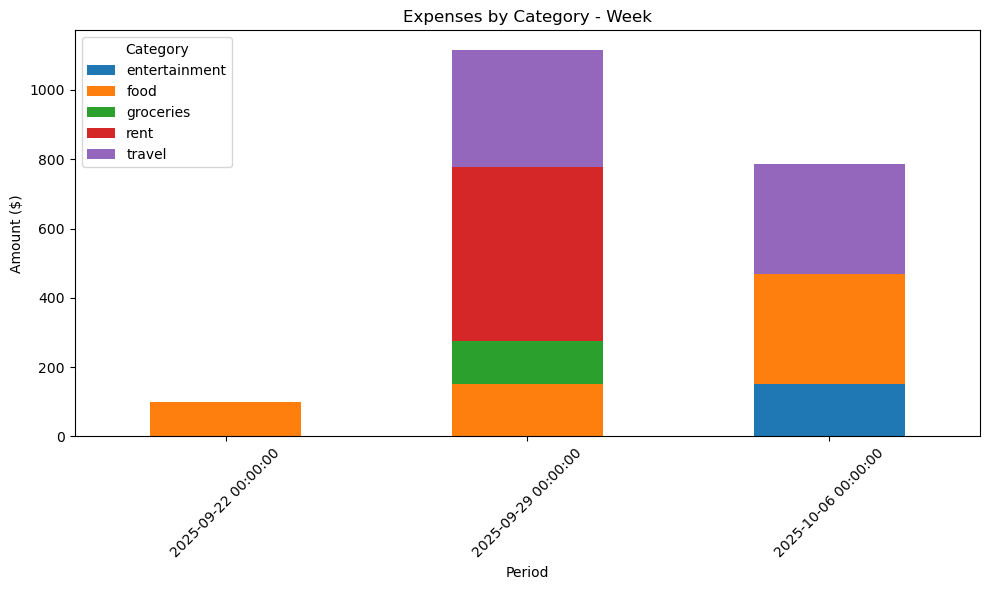

In [8]:
plot_expenses('week')

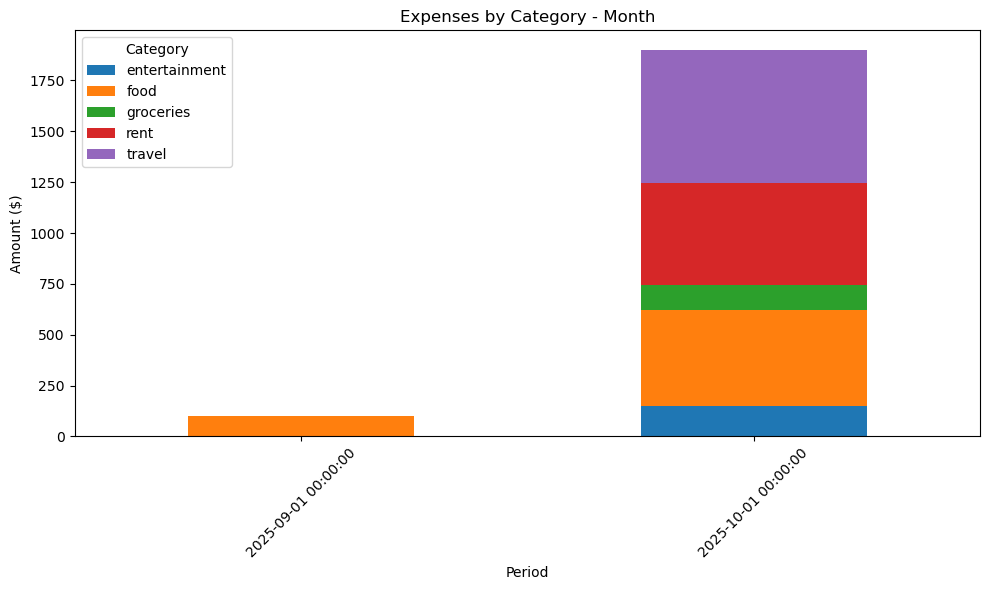

In [9]:
plot_expenses('month')

In [10]:
def export_expenses(filename='expenses.csv'):
    if not expenses:
        print("No expenses to export.")
        return
    df = pd.DataFrame(expenses)
    df.to_csv(filename, index=False)
    print(f"Expenses exported to {filename}")

def export_summary(period='week', filename='summary.csv'):
    if not expenses:
        print("No expenses to summarize.")
        return
    
    df = pd.DataFrame(expenses)
    
    if period == 'week':
        df['period'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
    elif period == 'month':
        df['period'] = df['date'].dt.to_period('M').apply(lambda r: r.start_time)
    else:
        print("Period must be 'week' or 'month'.")
        return
    
    summary = df.groupby(['period', 'category'])['amount'].sum().unstack(fill_value=0)
    summary['Total'] = summary.sum(axis=1)
    
    summary.to_csv(filename)
    print(f"{period.capitalize()}ly Summary exported to {filename}")

In [11]:
export_expenses()
export_summary('week', 'weekly_summary.csv')
export_summary('month', 'monthly_summary.csv')

Expenses exported to expenses.csv
Weekly Summary exported to weekly_summary.csv
Monthly Summary exported to monthly_summary.csv
